# Scania trucks air pressure system failure dataset implementation of Algos

***1. Introduction***
* Air Pressure System (APS) in trucks generates pressurized air that is used for various functions of trucks such as braking and gear changes. Lot of money is spent on un-necessary checks done by service person on APS system in trucks, which can be prevented by developing a machine learning model that can predict the failure of component in APS. In this way, service can be restricted to the trucks whose APS component is predicted to be failed by the model.

* The given dataset positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. Attributes of dataset are anonymized for proprietary reasons. This is a binary classification problem.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import csv

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import numpy as np
import re
import os
import datetime as dt
import pickle
from datetime import datetime
from scipy import stats
import random
from sklearn.model_selection import KFold
from IPython.display import display, Markdown
import pickle
from pandas import Series
from collections import defaultdict
import math
from scipy.stats import randint, uniform
import missingno as msno
import optuna
from sklearn.model_selection import cross_val_score


from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from tqdm import tqdm

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import f1_score, auc, accuracy_score, recall_score, precision_score,\
confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
train=pd.read_csv("C:\\Users\\shekh\\Downloads\\aps_failure_training_set (1).csv", skiprows=20)
test=pd.read_csv("C:\\Users\\shekh\\Downloads\\aps_failure_test_set.csv", skiprows=20)

In [4]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [6]:
#checking for the duplicates
train[train.duplicated()]

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000


In [7]:
test[test.duplicated()]

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000


In [8]:
#replacing na with NaN because na is in category type
train.replace(to_replace=['na', ' nan'], value=np.NaN, inplace=True)
test.replace(to_replace=['na', ' nan'], value=np.NaN, inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
#encoding the target column in binary form o and 1 as it has only 2 outputs
train['class']=le.fit_transform(train['class'])
test['class']=le.fit_transform(test['class'])

In [11]:
train['class'].unique()

array([0, 1])

In [12]:
test['class'].unique()

array([0, 1])

<AxesSubplot: xlabel='class', ylabel='count'>

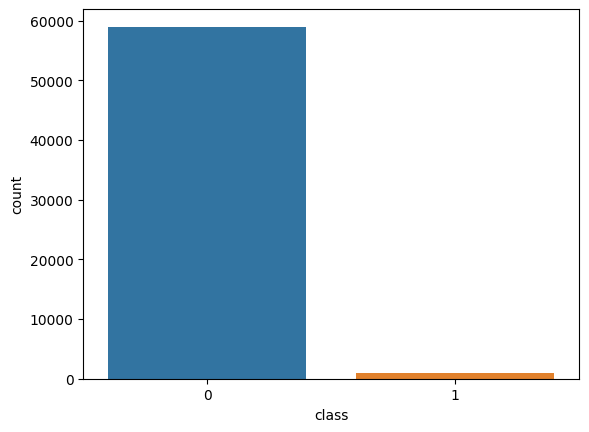

In [13]:
sns.countplot(train['class'])

In [14]:
# removing the null values in train data if the there are more na than 42000, it will remove the columns if it has more than 42000 na values
# we did this after observing the Eda and seeing how much percent of data is missing
train.dropna(axis = 1, thresh=42000, inplace=True)

In [15]:
train.shape

(60000, 161)

In [16]:
test.dropna(axis = 1, thresh=11000, inplace=True)

In [17]:
test.shape

(16000, 161)

In [18]:
#for train dataset
y_train = train['class']

In [19]:
train.drop(['class'],axis = 1,inplace = True)

In [20]:
#for test dataset
y_test = test['class']

In [21]:
test.drop(['class'],axis = 1,inplace = True)

## Handling the missing value by mean imputation

In [22]:
impute_mean = SimpleImputer(missing_values= np.nan, strategy='mean',copy = True, verbose= 2)
train_mean_imputed = pd.DataFrame(impute_mean.fit_transform(train),columns=train.columns)
test_mean_imputed = pd.DataFrame(impute_mean.transform(test),columns=test.columns)

In [23]:
train_mean_imputed.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


## Machine learning models

In [24]:
def result(cm): 
    sns.set(rc={'figure.figsize':(5,5)})
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
    sns.heatmap(df_cm, annot = True, fmt = "d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("Number of False Positive = ", cm[0][1])
    print("Number of False Negative = ", cm[1][0])
    Total_cost = cm[0][1] * 10 + cm[1][0] * 500
    print("Total cost = ",Total_cost )
    return Total_cost


### Logistic Regression

In [24]:
clf=LogisticRegression(penalty='l2', class_weight = 'balanced')

C_values = [10**x for x in range(-4,5)]
tuned_parameters = [{'C': C_values}]

gsvl = GridSearchCV(clf,tuned_parameters,cv=3,verbose=1,scoring='roc_auc', return_train_score=True, n_jobs=-1)
gsvl.fit(train_mean_imputed,y_train)
print("Best HyperParameter: ",gsvl.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best HyperParameter:  {'C': 10}


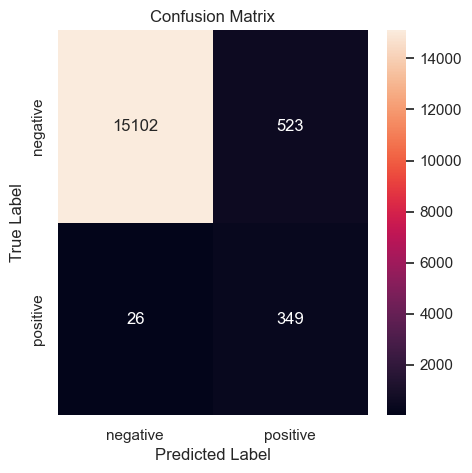

Number of False Positive =  523
Number of False Negative =  26
Total cost =  18230


18230

In [25]:
clf = LogisticRegression(penalty='l2', C=0.1 ,n_jobs= -1, class_weight = 'balanced')
clf.fit(train_mean_imputed,y_train)
y_pred = clf.predict(test_mean_imputed)
cm =confusion_matrix (y_test, y_pred)
result(cm)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.40      0.93      0.56       375

    accuracy                           0.97     16000
   macro avg       0.70      0.95      0.77     16000
weighted avg       0.98      0.97      0.97     16000



### SVC

In [24]:
svc=SVC(class_weight='balanced')

svc.fit(train_mean_imputed, y_train)

SVC(class_weight='balanced')

In [25]:
svc_pred=svc.predict(test_mean_imputed)

In [26]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15625
           1       0.35      0.94      0.51       375

    accuracy                           0.96     16000
   macro avg       0.67      0.95      0.74     16000
weighted avg       0.98      0.96      0.97     16000



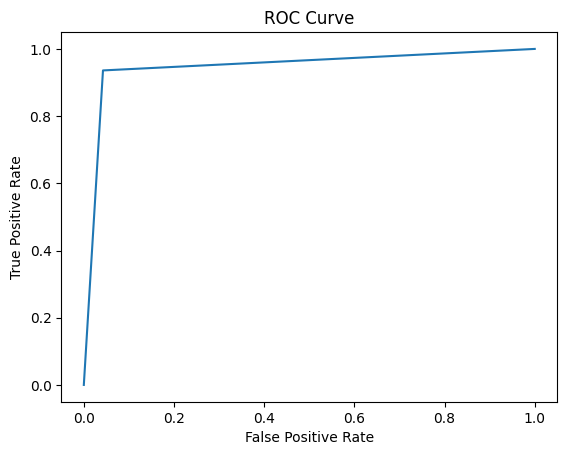

AUC-ROC score: 0.9467519999999999


In [28]:
fpr, tpr, thresholds = roc_curve(y_test, svc_pred)
roc_auc = roc_auc_score(y_test, svc_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC-ROC score
print('AUC-ROC score:', roc_auc)

### Decision Tree( hyperparameter tunning by oputna)

In [74]:
def objective(trial):
    # Define the hyperparameters to optimize
    max_depth = trial.suggest_int('max_depth', 1, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Create the Decision Tree classifier with the optimized hyperparameters
    clf = DecisionTreeClassifier(max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf)

    # Evaluate the classifier with cross-validation
    score = cross_val_score(clf, train_mean_imputed, y_train, cv=5).mean()

    return score

In [75]:
# Define the study for Optuna to optimize the hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2023-04-06 17:57:41,214] A new study created in memory with name: no-name-67769ab7-c200-4315-a3f5-af0448679dbc
[I 2023-04-06 17:58:07,112] Trial 0 finished with value: 0.9906166666666666 and parameters: {'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.9906166666666666.
[I 2023-04-06 17:58:27,149] Trial 1 finished with value: 0.9907 and parameters: {'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.9907.
[I 2023-04-06 17:58:45,021] Trial 2 finished with value: 0.9905666666666667 and parameters: {'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.9907.
[I 2023-04-06 17:58:54,270] Trial 3 finished with value: 0.9882333333333333 and parameters: {'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.9907.
[I 2023-04-06 17:59:10,191] Trial 4 finished with value: 0.9907499999999999 and parameters: {'max_depth': 7, 

[I 2023-04-06 18:08:57,619] Trial 39 finished with value: 0.9907833333333335 and parameters: {'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 21 with value: 0.99125.
[I 2023-04-06 18:09:02,481] Trial 40 finished with value: 0.9866666666666667 and parameters: {'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 21 with value: 0.99125.
[I 2023-04-06 18:09:20,629] Trial 41 finished with value: 0.99115 and parameters: {'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 21 with value: 0.99125.
[I 2023-04-06 18:09:36,414] Trial 42 finished with value: 0.991 and parameters: {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 21 with value: 0.99125.
[I 2023-04-06 18:09:54,340] Trial 43 finished with value: 0.9908999999999999 and parameters: {'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 21 with value: 0.99125.
[I 2023-04-06 18:10:14,437] Trial 44 finishe

[I 2023-04-06 18:22:06,386] Trial 78 finished with value: 0.9911166666666666 and parameters: {'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 71 with value: 0.9914999999999999.
[I 2023-04-06 18:22:26,665] Trial 79 finished with value: 0.9908999999999999 and parameters: {'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 71 with value: 0.9914999999999999.
[I 2023-04-06 18:22:48,983] Trial 80 finished with value: 0.9905999999999999 and parameters: {'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 10}. Best is trial 71 with value: 0.9914999999999999.
[I 2023-04-06 18:23:11,527] Trial 81 finished with value: 0.9910166666666667 and parameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 71 with value: 0.9914999999999999.
[I 2023-04-06 18:23:33,851] Trial 82 finished with value: 0.9912666666666666 and parameters: {'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best i

In [76]:
print('Best hyperparameters: ', study.best_params)

Best hyperparameters:  {'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 2}


In [77]:
best_clf = DecisionTreeClassifier(max_depth=study.best_params['max_depth'],
                                   min_samples_split=study.best_params['min_samples_split'],
                                   min_samples_leaf=study.best_params['min_samples_leaf'])

In [78]:
best_clf.fit(train_mean_imputed, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=11)

In [79]:
dt_optuna_predict=best_clf.predict(test_mean_imputed)

In [80]:
accuracy_score(y_test, dt_optuna_predict)

0.98925

In [81]:
print(classification_report(y_test, dt_optuna_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.87      0.63      0.73       375

    accuracy                           0.99     16000
   macro avg       0.93      0.81      0.86     16000
weighted avg       0.99      0.99      0.99     16000



In [82]:
roc_auc_score(y_test, dt_optuna_predict)

0.8149120000000001

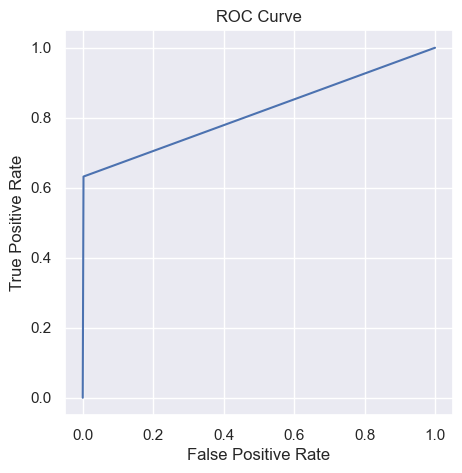

AUC-ROC score: 0.8149120000000001


In [83]:
fpr, tpr, thresholds = roc_curve(y_test, dt_optuna_predict)
roc_auc = roc_auc_score(y_test, dt_optuna_predict)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC-ROC score
print('AUC-ROC score:', roc_auc)

### Random forest classifier(by gridsearchcv)

In [29]:
clf=RandomForestClassifier(class_weight = 'balanced')

depth=list(range(3, 10 ,3))
nEstimator = list(range(3, 20 ,3))
tuned_parameters = [{'max_depth':depth,'n_estimators':nEstimator}]
gsvr = GridSearchCV(clf,tuned_parameters,cv=3,verbose=1,scoring='roc_auc', return_train_score=True, n_jobs=-1)
gsvr.fit(train_mean_imputed,y_train)
print("Best HyperParameter: ",gsvr.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best HyperParameter:  {'max_depth': 6, 'n_estimators': 15}


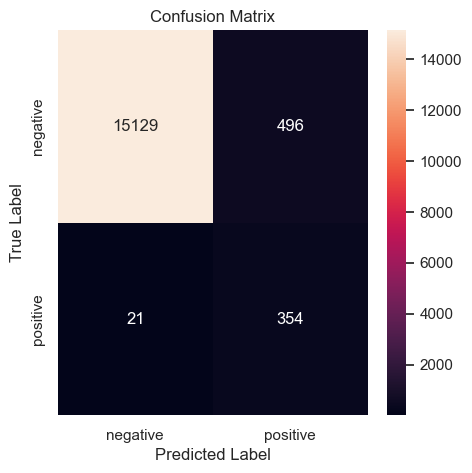

Number of False Positive =  496
Number of False Negative =  21
Total cost =  15460


15460

In [33]:
clf = RandomForestClassifier(n_estimators= 15 , max_depth=6, n_jobs= -1, class_weight = 'balanced')
clf.fit(train_mean_imputed,y_train)
y_predd = clf.predict(test_mean_imputed)
cm =confusion_matrix (y_test, y_pred)
result(cm)

In [36]:
print(classification_report(y_test, y_predd))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.40      0.94      0.56       375

    accuracy                           0.97     16000
   macro avg       0.70      0.95      0.77     16000
weighted avg       0.98      0.97      0.97     16000



### Adaboost(Decision Tree)

In [24]:
dtc = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(base_estimator=dtc, n_estimators=50, learning_rate=1.0, random_state=42)

In [25]:
ada.fit(train_mean_imputed, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [29]:
y_predict = ada.predict(test_mean_imputed)

In [30]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.84      0.62      0.71       375

    accuracy                           0.99     16000
   macro avg       0.92      0.81      0.85     16000
weighted avg       0.99      0.99      0.99     16000



### Gradient boosting classifier


In [26]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [27]:
gbc.fit(train_mean_imputed, y_train)

GradientBoostingClassifier(random_state=42)

In [29]:
y_predy = gbc.predict(test_mean_imputed)

In [30]:
print(classification_report(y_test, y_predy))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.89      0.70      0.78       375

    accuracy                           0.99     16000
   macro avg       0.94      0.85      0.89     16000
weighted avg       0.99      0.99      0.99     16000



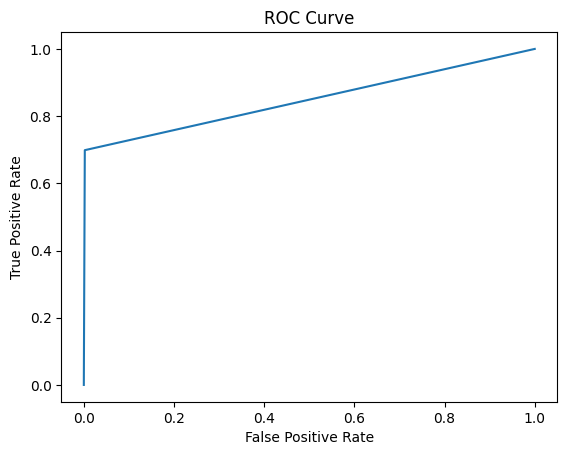

AUC-ROC score: 0.8482453333333333


In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_predy)
roc_auc = roc_auc_score(y_test, y_predy)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC-ROC score
print('AUC-ROC score:', roc_auc)

### xg boost classifier

In [32]:
# model fitting and hyper parameter tuning to find the best parameter
clf=XGBClassifier(scale_pos_weight=59)

depth=list(range(3, 10 ,3))
nEstimator = list(range(3, 20 ,3))
tuned_parameters = [{'max_depth':depth,'n_estimators':nEstimator}]

gsv = GridSearchCV(clf,tuned_parameters,cv=3,verbose=1,scoring='roc_auc', return_train_score=True, n_jobs=-1)
gsv.fit(train_mean_imputed,y_train)
print("Best HyperParameter: ",gsv.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best HyperParameter:  {'max_depth': 6, 'n_estimators': 15}


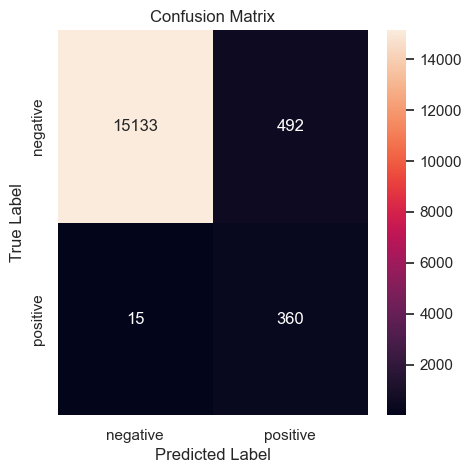

Number of False Positive =  492
Number of False Negative =  15
Total cost =  12420


12420

In [33]:
clf = XGBClassifier(max_depth= 3,  n_estimators= 18, n_jobs= -1, scale_pos_weight=40, min_child_weight=44)
clf.fit(train_mean_imputed,y_train)
y_pred = clf.predict(test_mean_imputed)
cm =confusion_matrix (y_test, y_pred)
result(cm)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.42      0.96      0.59       375

    accuracy                           0.97     16000
   macro avg       0.71      0.96      0.79     16000
weighted avg       0.99      0.97      0.97     16000



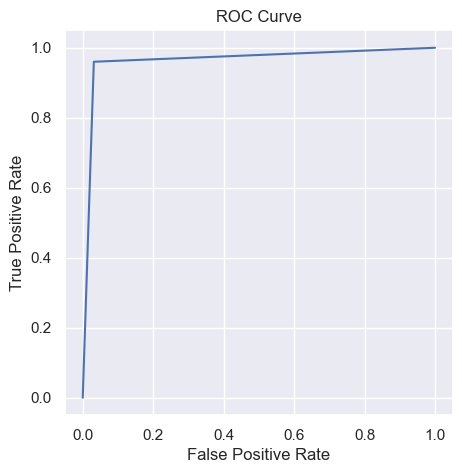

AUC-ROC score: 0.964256


In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC-ROC score
print('AUC-ROC score:', roc_auc)

#### We can conclude following by observing all the algorithms
 * as it is clear that mean imputation is used to fill nan values we can use median, mode also but me
 * as we can cleary see that the data was imbalanced as neg outputs were more compared to pos, so we used class_weight='balanced' to give minor class more priority and major less priority
